# **Cookie Cats Experiment Analysis**
*Presented by: Group 5*


*   Indah Reski Pratiwi
*   Devi Puspita D.
*   Luh Kade Devi Dwiyani
*   Muhammad Akmal

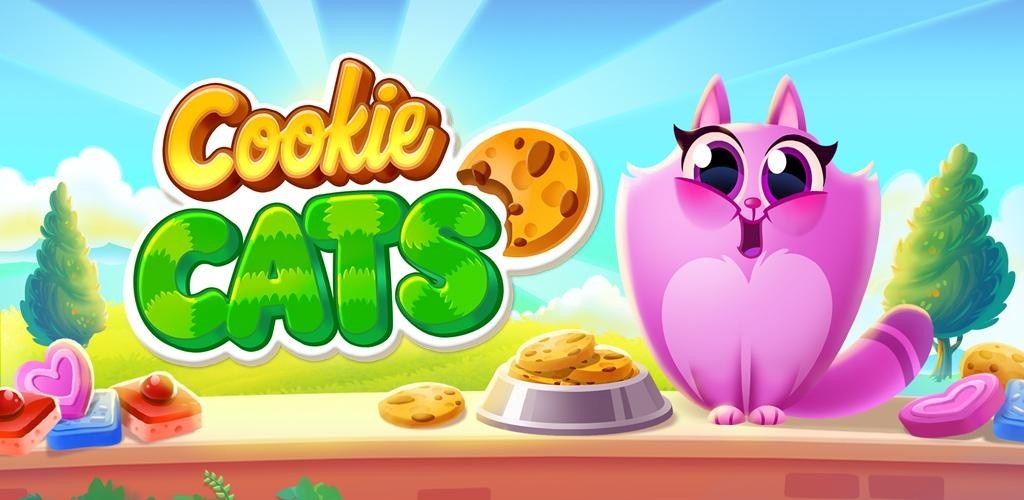

### **Background**

**Cookie Cats** is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase.

*The owner wants to analyze the impact on player retention and game rounds if the first gate in Cookie Cats was moved from level 30 to level 40.*

### **Product/Business Problem**
**1. Goal/Objective**

Find out where should the gate be placed and how the gate placement affects player retention rate and game rounds. 

**2. General Problem**

The gate that players encounter while progressing through the game force them to wait a while before they can move forward or make in-app purchases.

**3. Root Cause Analysis**

*   To unlock the gate, players must make an in-app purchase or required to submit a specific number of keys
*   Players must watch ads to move to the next level

**4. Problem Statement**

Does moving the first gate from level 30 to 40 in Cookie Cats affect the player retention rate and game rounds?

**5. Proposed Solution**

Moving the first gate from level 30 to 40 in Cookie Cats.

### **Design Experiment**

**1. Key Metrics**

Retention rate and number of game rounds played

**2. Population**

Cookie cats game player/user that installed the game while the A/B testing was running

**3. Experiment Groups and Period**

*   **Control group**	:  gate is located at level 30
*   **Experiment/Treatment group** :  gate is located at level 40

**4. Business Hypothesis**

Moving the first gate from level 30 to level 40 in cookie cats game will increase player retention rate and change game rounds

**5. Hypothesis**

*   H0 : RR gate_30 = RR gate_40, There is no significant effect on increasing player retention rate between control group and treatment group
*   H1 : RR gate_30 > RR gate_40, There is significant effect on increasing player retention rate between control group and treatment group

**RR = Retention rate*

### **Data Preparation**

In [ ]:
# Importing packaged
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/wandakinasih/gg2/main/cookie_cats.csv")

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### **Experiment Monitoring**


The method to monitoring the experiment we conducted is **Monitoring Dashboard**. Monitoring Dashboard is a set of metric groups or custom views that you can use to monitor the performance of the systems defined in the System Status task.

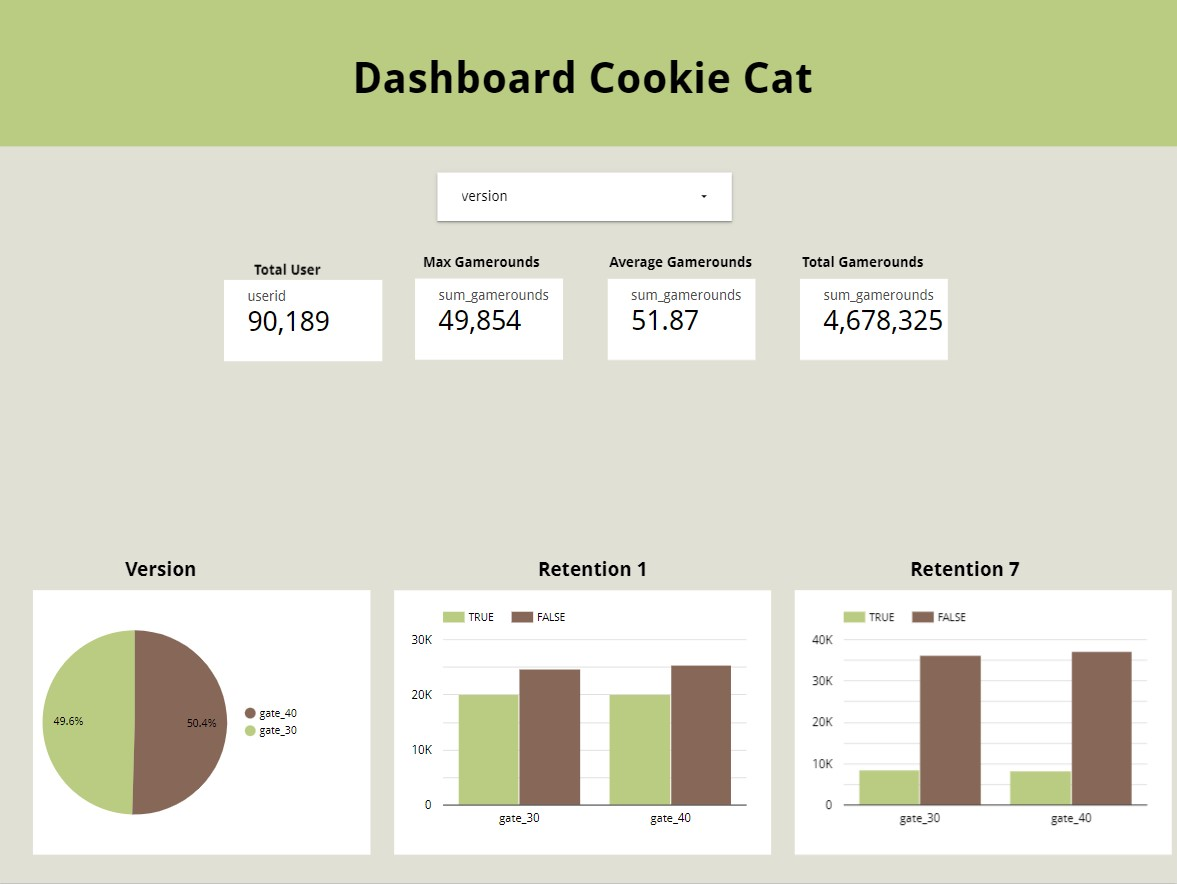

### **Experiment Analysis**

In [ ]:
# The dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
# Check if there is duplicated users in the control group (gate_30) and the Experiment group (gate_40)
# By checking the number of unique value under the userid column, as long as the total users
# and total different users are the same, there is no duplicated users.

if (df["userid"].nunique() == df["userid"].count()) :
    print("There are no duplicated user ids in the dataset")

There are no duplicated user ids in the dataset


In [ ]:
# Relative frequency of experimental condition
# Multiply by 100 to convert from proportions to percentage per group

percent_group = df['version'].value_counts(normalize = True) *100
percent_group

# The Control and Experiment Group percentage’s are about the same; ready for A/B test

gate_40    50.437415
gate_30    49.562585
Name: version, dtype: float64

### **Descriptive Analysis**

In [ ]:
# Make a preliminary understanding of the number of rounds played by the player's game
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

Mean is 51 rounds and 25% of players have less than 5 rounds during the first 14 days. We can see that the max value is almost 50000, so we will confirm whether it is an outliers value by using a boxplot.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


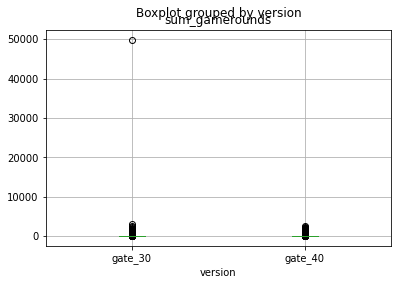

In [ ]:
# Create a box plot to clearly see outliers in the dataset

df.boxplot(column='sum_gamerounds', by='version')
plt.show()

In [ ]:
# Exclude the outlier in the dataset
df = df[df.sum_gamerounds < df.sum_gamerounds.max()]
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

We see that exist clear outliers in the dataset since one user has recorded 49854 Game rounds played in less than 14 days, meanwhile, the max recorded, excluding the outlier, is around 2900. 

sum_gamerounds
0    3994
1    5538
2    4606
3    3958
4    3629
Name: userid, dtype: int64

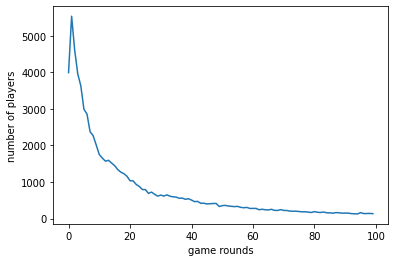

In [ ]:
# Number wheel in accordance with the game play packets drawing
plot_data = df.groupby('sum_gamerounds')['userid'].count()

ax = plot_data[:100].plot()
ax.set_xlabel('game rounds')
ax.set_ylabel('number of players')
plot_data.head()

The plot above shows that some players install the game but then never play it (0 game rounds).

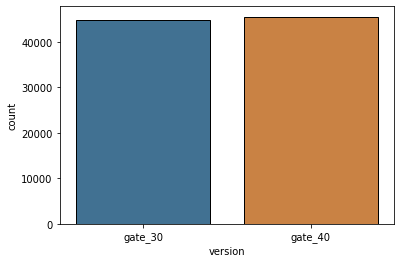

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['version'], edgecolor='black', saturation=0.55)
plt.show()

on this chart you can see the number of users per each group. Group gate 40 has more number than gate 30

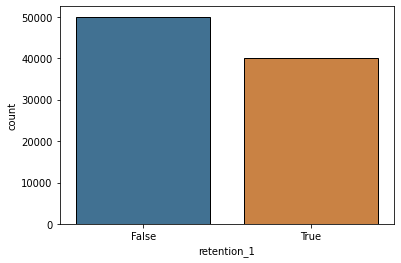

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['retention_1'], edgecolor='black', saturation=0.55)
plt.show()

on this chart you can see the number of users who returned and played return after 1 day of installing the application and who didn't. more users who don't come back after 1 day of installing the app

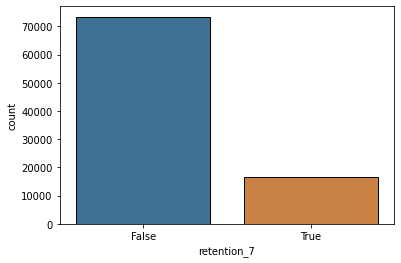

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['retention_7'], edgecolor='black', saturation=0.55)
plt.show()

on this chart you can see the number of users who returned and played  return after 7 day of installing the application and who didn't. more users who don't come back after 7 day of installing the app

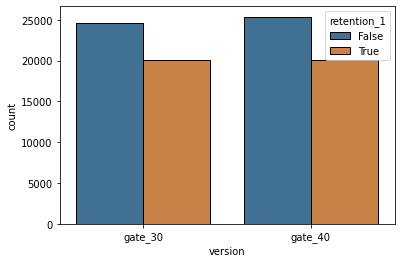

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['version'], edgecolor='black', saturation=0.55, hue=df['retention_1'])
plt.show()

on this chart you can see the number of users who return and play return after 1 day of installing the application and who didn't. which have been grouped into 2, gate 30 and 40. gate 40 gets more false numbers (users do not return) but gate 30 get the number of true (returning users) more

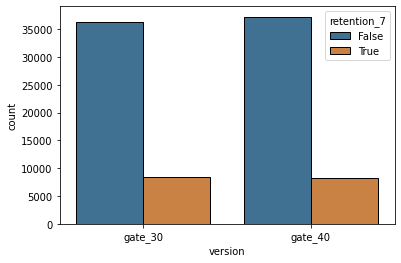

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['version'], edgecolor='black', saturation=0.55, hue=df['retention_7'])
plt.show()

The same as retention 1. on this chart you can see the number of users who return and play after 7 day of installing the application and who didn't. which have been grouped into 2, gate 30 and 40. gate 40 gets more false numbers (users do not return) but gate 30 get the number of true (returning users) more

In [ ]:
# Retention 7 and Retention 1 columns, value name change from True and False, to 1 and 0
df['retention_1'] = df['retention_1'].replace(True, 1).astype(int)
df['retention_7'] = df['retention_7'].replace(True, 1).astype(int)
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [ ]:
# Calculating 1-day and 7-days retention for each A/B group
df_result = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_result

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44699,0.448198,0.190183,2294941
gate_40,45489,0.442283,0.182000,2333530


*   There was a decrease in day 1 retention when the gate was moved to level 40 (44.2%) compared to the control group when it was at level 30 (44.8%).
*   There was a decrease in day 7 retention when the gate was moved to level 40 (18.2%) compared to the control group when it was at level 30 (19.0%).

### **Inferential Analysis**

A **chi-squared test** (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

*In this test, we will use a significance level of alpha of 5% or 0.05*

In [ ]:
# Perform Chi-Square Test by calculating the P value 
# Chi-square test of independence of variables in a contingency table
from scipy.stats import chi2_contingency

# retention_1, Chi-Square test result values as the following:
g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_1"]))
print('retention_1, chi statistic is', g)
print('retention_1, p-value is', p)
print('retention_1, degree of freedom is', dof)
print('retention_1, expected results is', expctd)

retention_1, chi statistic is 3.169835543170799
retention_1, p-value is 0.07500999897705693
retention_1, degree of freedom is 1
retention_1, expected results is [[24798.35970417 19900.64029583]
 [25236.64029583 20252.35970417]]


**Summary for retention 1:**

Since p-value = 0.075 > alpha = 0.05, **we fail to reject the null hypothesis**. It means that there is no significant effect on increasing player retention rate between control group and treatment group in Day-1 retention

In [ ]:
# retention_7, Chi-Square test result values as the following:
g, p, dof, expctd =  chi2_contingency(pd.crosstab(index=df["version"], columns=df["retention_7"]))
print('retention_7, chi statistic is', g)
print('retention_7, p-value is', p)
print('retention_7, degree of freedom is', dof)
print('retention_7, expected results is', expctd)

retention_7, chi statistic is 9.91527552890567
retention_7, p-value is 0.0016391259678654425
retention_7, degree of freedom is 1
retention_7, expected results is [[36382.49203885  8316.50796115]
 [37025.50796115  8463.49203885]]


**Summary for retention 7:**

Since p-value = 0.0016 < alpha = 0.05, **we can reject the null hypothesis** (day-7 retention is higher when the gate is at level 30 than when it is at level 40). It means that there is significant effect on increasing player retention rate between control group and treatment group in Day-7 retention.

### **Conclusion**

Based on the analysis carried out. In the **Descriptive Analysis**, moving the gate position from level 30 to level 40 caused a decrease in all three metrics (1.7 retention and number of gamerounds). In the **Inferential Analysis**, we derive the conclusion for retention 1 that p-value = 0.075 > alpha = 0.05, we fail to reject the null hypothesis. That is, moving the gate from level 30 to 40 has no significant effect on increasing player retention. We also use chi square to measure the p value for retention 7 so that we get p value = 0.0016 < alpha = 0.05, we can reject the null hypothesis. This means that moving the gate from level 30 to 40 has a significant effect on increasing player retention. Based on the results of the two analyzes, to keep retention_1 and retention_7 high, it is better **not** to move the gate from gate 30 to gate 40.

### **Action Plan**

1. Added in-game purchase metrics
2. Moving the gate to a level earlier than 30 with the consideration that it will reduce the playing time period and minimize the boredom of the players